In [1]:
source('source.r')

Packages Loaded:
ncdf4 R.matlab openxlsx RColorBrewer compiler lattice geosphere readxl data.table rworldmap rworldxtra


Loading required package: ncdf4
Loading required package: R.matlab
Warning message:
"package 'R.matlab' was built under R version 3.4.3"R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen

Loading required package: openxlsx
Warning message:
"package 'openxlsx' was built under R version 3.4.3"Loading required package: RColorBrewer
Loading required package: compiler
Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.4.3"Loading required package: geosphere
Warning message:
"package 'geosphere' was built under R version 3.4.3"Loading required package: readxl
Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.4.3"Loading required package: rworldmap
Warning message:
"package 'rworldmap' was built under R version 3.4.3"Loading required package: sp
Warning message:
"

In [8]:
input.dir = 'Raw Data/FRRF/'

frrf.files = list.files(input.dir, pattern = '*.csv')

length(frrf.files)

[1] 929

In [26]:
get.data = function(input.dir, file.name) {
    file = paste0(input.dir, file.name)
    
    year = substr(file.name, 1, 4)
    month = substr(file.name, 5, 6)
    day = substr(file.name, 7, 8)
    hour = substr(file.name, 10, 11)
    minute = substr(file.name, 12, 13)
    second = substr(file.name, 14, 15)
    
    datetime = as.POSIXct(paste0(year, '-', month, '-', day, ' ', hour, ':', minute, ':', second))
    
    data.a = fread(file, sep = ',', skip = 29, nrows = 21, showProgress = FALSE)
    data.a = data.a[,-c(1, 23, 31)]
    
    #data.b = fread(file, sep = ',', skip = 53, nrows = 21)
    #data.b = data.b[,-c(1, 23, 31)]
    
    #data.c = fread(file, sep = ',', skip = 77, nrows = 21)
    #data.c = data.c[,-c(1, 23, 31)]
    
    #data.d = fread(file, sep = ',', skip = 101, nrows = 21)
    #data.d = data.d[,-c(1, 23, 31)]
    
    data.s = fread(file, sep = ',', skip = 1, nrows = 6)
    
    #list(Time = datetime, A = data.a, B = data.b, C = data.c, D = data.d, S = data.s)
    list(Time = datetime, A = data.a, S = data.s)
}

In [15]:
data = get.data(input.dir, frrf.files[1])

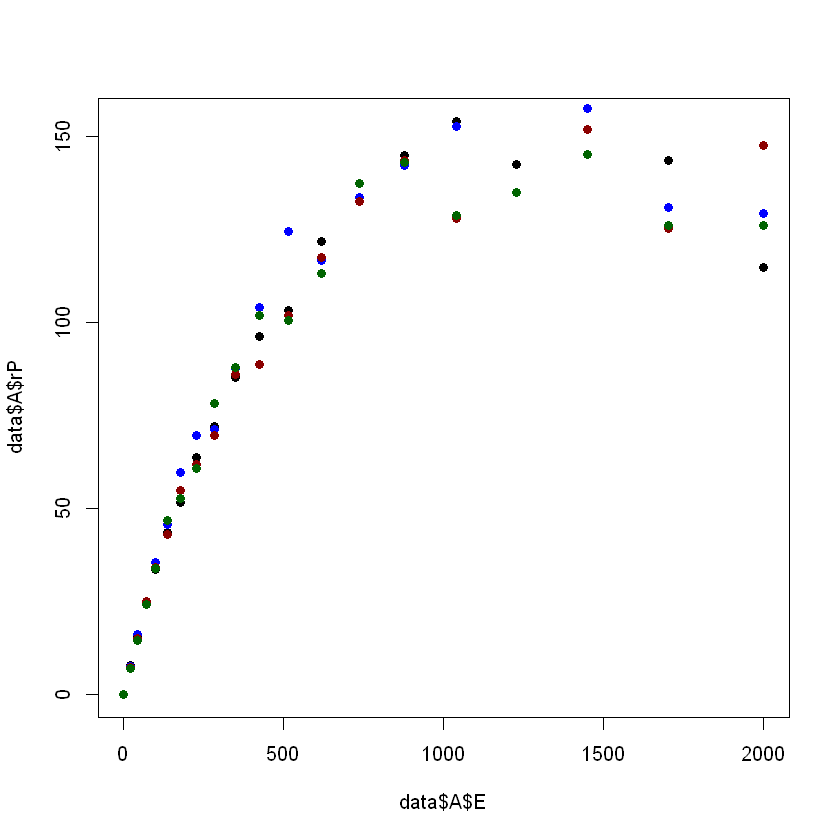

In [37]:
plot(data$A$E, data$A$rP, pch = 16)
points(data$B$E, data$B$rP, pch = 16, col='blue')
points(data$C$E, data$C$rP, pch = 16, col='dark red')
points(data$D$E, data$D$rP, pch = 16, col='dark green')

In [16]:
load('RStates/ship.ncp.rdata')

In [59]:
get.chl = function() {
    temp = get.data(input.dir = input.dir, file = frrf.files[1])
    chl = data.frame(Date = as.numeric(temp$Time), Chl = temp$A[1,5])
    
    for (i in 2:length(frrf.files)) {
        temp = get.data(input.dir = input.dir, file = frrf.files[i])
        chl = rbind(chl, data.frame(Date = as.numeric(temp$Time), Chl = temp$A[1,5]))
    }
    chl
}

In [74]:

chl = get.chl()
chl$Date = as.POSIXct(chl$Date, origin = '1970-01-01 00:00:00', tz = 'UTC')
str(chl)

'data.frame':	929 obs. of  2 variables:
 $ Date  : POSIXct, format: "2017-05-31 17:52:36" "2017-05-31 18:42:02" ...
 $ X.Chl.: num  12.08 21.06 8.21 3.97 4.12 ...


In [75]:
chl$ship = 0
for (i in 1:nrow(chl)) {
    chl$ship[i] = median(ship.data$FL[which(as.numeric(difftime(chl$Date[i], ship.data$DT, units = 'mins'))^2 < 15^2)], na.rm = TRUE)
}

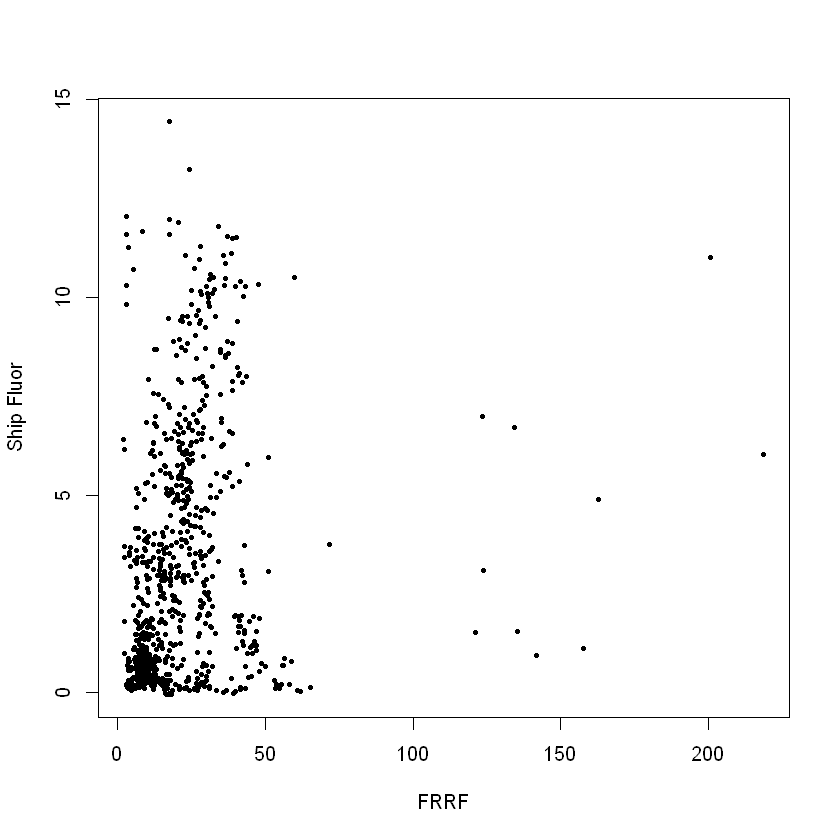

In [76]:
options(warn=-1)

#plot(ship.data$DT, ship.data$FL, pch=20, cex=0.1, ylim=c(0,100), yaxs='i')
#points(chl$Date, chl$X.Chl., pch=15, col='dark green', cex=0.3)
plot(chl$X.Chl., chl$ship, pch=16, cex=0.5, ylab='Ship Fluor', xlab='FRRF')

In [17]:
str(data$A)

Classes 'data.table' and 'data.frame':	21 obs. of  34 variables:
 $ Saq         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ E           : int  0 20 42 69 100 135 177 226 282 348 ...
 $ Start       : chr  "00:16" "06:19" "07:22" "08:25" ...
 $ s           : int  16 379 442 505 568 631 694 757 820 884 ...
 $ [Chl]       : num  12.1 13 13.5 13.6 13.1 ...
 $ ADC         : int  46 48 48 47 47 46 46 46 46 48 ...
 $ rP          : num  0 7.74 15.45 24.27 33.53 ...
 $ rP          : num  0 7.54 15.37 24.34 33.84 ...
 $ JPII        : num  0 95.7 197.5 319.7 452.4 ...
 $ JVPII       : num  0 0.0381 0.076 0.119 0.165 0.214 0.254 0.314 0.354 0.419 ...
 $ F'          : num  2.01 2.17 2.25 2.27 2.17 ...
 $ Fm'         : num  3.45 3.54 3.55 3.5 3.27 ...
 $ Fq'/Fm'     : num  0.417 0.387 0.368 0.352 0.335 0.323 0.292 0.282 0.255 0.245 ...
 $ C           : num  NA 0.066 0.113 0.144 0.151 0.19 0.26 0.27 0.342 0.389 ...
 $ p           : num  0.18 0.165 0.291 0.249 0.233 0.221 0.337 0.25 0.303 0.327 ...
 $ RSigma   

In [42]:
temp$A

Saq,E,Start,s,[Chl],ADC,rP,rP.1,JPII,JVPII,...,QoSE,QmSE,QSE,QSE ratio,Qo points,Qo slope,Qo intercept,Qm points,Qm slope,Qm intercept
1,0,00:50,50,121.1,44,0.000,0.000,0.00,0.000,...,0.0257,0.0298,0.0394,0.864,12,0.4450,20.50,36,-0.001258,33.34
2,22,12:08,728,127.3,48,8.967,9.056,71.59,0.451,...,0.0801,0.1150,0.1400,0.699,12,0.4510,21.64,36,0.000984,34.93
3,49,13:11,791,131.6,49,19.530,19.560,152.40,0.982,...,0.0978,0.1100,0.1470,0.886,12,0.4470,22.27,36,0.000458,35.51
4,81,14:14,854,136.7,50,30.710,31.190,244.10,1.544,...,0.0872,0.1070,0.1380,0.812,12,0.4250,22.93,36,0.002902,35.77
5,118,15:17,917,138.0,50,44.020,43.610,378.80,2.213,...,0.0488,0.1330,0.1410,0.368,12,0.4320,23.34,36,0.002022,35.92
6,163,16:20,980,140.2,50,58.930,57.350,522.00,2.963,...,0.0831,0.1360,0.1600,0.609,12,0.4160,23.80,36,0.004406,35.82
7,216,17:23,1043,145.2,50,71.900,71.800,658.80,3.615,...,0.0656,0.0954,0.1160,0.687,12,0.3980,24.10,36,0.004708,35.49
8,279,18:27,1107,146.4,49,87.380,86.830,862.50,4.393,...,0.0833,0.1100,0.1380,0.758,12,0.3610,24.49,36,0.008837,34.75
9,353,19:30,1170,146.6,48,103.100,101.900,1037.00,5.186,...,0.1230,0.1110,0.1660,1.114,14,0.3170,24.46,36,0.007729,33.71
10,442,20:33,1233,145.5,46,115.600,116.600,1339.00,5.809,...,0.0854,0.0875,0.1220,0.976,13,0.2800,24.23,36,0.005190,32.32
